In [1]:
import yfinance as yf

# Download data
gs = yf.download("GS", start="2011-01-01", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas as pd
# Preprocess data
dataset_ex_df = gs.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
dataset_ex_df.set_index('Date', inplace=True)
dataset_ex_df = dataset_ex_df['Close'].to_frame()

In [3]:
from pmdarima.arima import auto_arima

# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(dataset_ex_df['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12944.119, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12965.532, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12950.184, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12952.296, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12963.855, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12942.196, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12941.178, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12941.872, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12943.669, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12943.203, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12939.507, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12950.671, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12940.534, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=12940.216, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

In [8]:
history

[array([173.05000305]),
 array([173.08000183]),
 array([174.]),
 array([172.21000671]),
 array([170.69000244]),
 array([169.75999451]),
 array([169.36000061]),
 array([171.66999817]),
 array([171.57000732]),
 array([175.]),
 array([174.67999268]),
 array([166.49000549]),
 array([165.69000244]),
 array([166.19999695]),
 array([166.30000305]),
 array([161.97999573]),
 array([161.30999756]),
 array([164.02999878]),
 array([161.77000427]),
 array([163.61999512]),
 array([165.33000183]),
 array([165.05000305]),
 array([164.63999939]),
 array([164.83000183]),
 array([167.13000488]),
 array([168.55000305]),
 array([166.00999451]),
 array([165.33999634]),
 array([166.66000366]),
 array([167.52000427]),
 array([167.91000366]),
 array([168.80999756]),
 array([167.16000366]),
 array([168.03999329]),
 array([162.94000244]),
 array([163.08999634]),
 array([163.44000244]),
 array([165.11999512]),
 array([163.77999878]),
 array([161.30999756]),
 array([161.69000244]),
 array([164.49000549]),
 array([

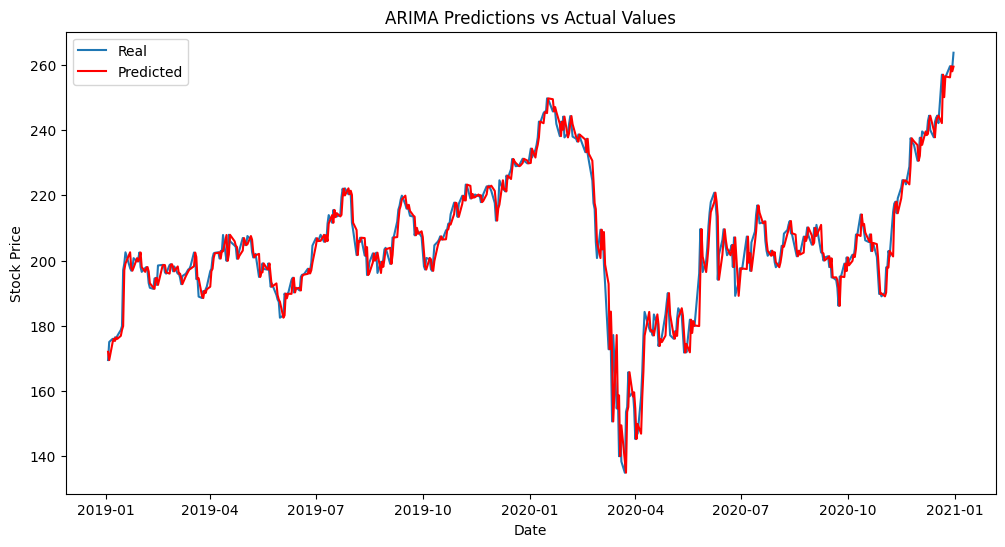

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()